In [2]:
#Importy
import JpgToSin
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
from datetime import datetime
from skimage.transform import resize
from skimage.io import imread

In [3]:
#Zdefiniowane klasy
class Tomograph:
    def __init__(self, iterations, step, detector_num, detector_rng, isFilter, isDicom, source, patient, descript):
        self.iterations = iterations
        self.step = step
        self.detector_num = detector_num
        self.detector_rng = detector_rng
        self.isFilter = isFilter
        self.isDicom = isDicom
        self.source = source
        
        self.original = []
        self.input_image = [] 
        self.reverses = []
        self.sinograms = []
        
        self.patient = "Karol Okrasa"
        self.descript = "description"
        self.date = datetime.now()
        
    def main(self):
        image = cv2.cvtColor(imread(self.source), cv2.COLOR_RGBA2GRAY)
        self.original = np.copy(image)
        resized = resize(image, (round(len(image) / 4), round(len(image[0]) / 4)))
        new_edge = round(math.sqrt(2) * max(len(resized), len(resized[0])))
        radius = round(new_edge / 2)

        image = np.zeros([new_edge, new_edge])
        image[radius - round(len(resized) / 2) : radius + round(len(resized) / 2), radius - round(len(resized[0]) / 2) : radius + round(len(resized[0]) / 2)] = resized
        self.input_image = image
        
        #Make sinogram
        sin = JpgToSin.Sinogram()
        self.sinograms = sin.makeSinogram(image, self.iterations, self.step, self.detector_num, self.detector_rng)
        
        fig, plots = plt.subplots(1, 2)
        plots[0].imshow(self.original, cmap='gray')
        plots[1].imshow(self.sinograms, cmap='gray')

        #make_reverse_sinogram(sinograms[-1], [len(image), len(image[0])])

        #display_images(image, sinograms[-1], reverses[-1])

TypeError: Image data of dtype object cannot be converted to float

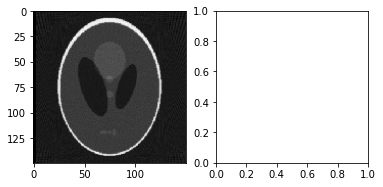

In [4]:
#GUI
iterations = 360
step = 1
detector_num = 90
detector_rng = 90
isFilter = False
isDicom = False
source = "Zdjecia/Po_konwersji/06.png"
patient = ""
descript = ""

tomograph = Tomograph(iterations, step, detector_num, detector_rng, isFilter, isDicom, source, patient, descript)

tomograph.main()